In [ ]:
# Author: Om Soni (gm0528)
# week 11: ensemble learning Option 2
# DSA6100 Wayne State University

In [13]:
import warnings
warnings.filterwarnings("ignore")
%pylab inline
import pandas as pd
import graphviz

Populating the interactive namespace from numpy and matplotlib


In [14]:
# The dataset is selected from Kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/version/2#
# A decision tree is trained to predict the quality of wine based on given predictors.
# Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. 
# Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. 
# Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. 
# Tree based methods empower predictive models with high accuracy, stability and ease of interpretation.
# The decision of making strategic splits heavily affects a tree’s accuracy. Decision trees use multiple algorithms 
# to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of 
# resultant  sub-nodes. A decision tree classifier from sklearn.tree package was used to fit the decision tree model 
# with entropy as measure of quality of split.  


In [15]:
data = pd.read_csv("winequality-red.csv", header=0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
x_data =  data.iloc[:,0:(len(data.columns)-2)]
y_data =  data.iloc[:,len(data.columns)-1]
#y_data.head()

In [17]:
# Split the dataset into train and test and fit a decision tree and measure the performance by predicting
# the values on test data

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=3)

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20 ,min_samples_leaf=10)
clf = clf.fit(x_train,y_train)
dp = clf.decision_path(x_train)
#print(dp)

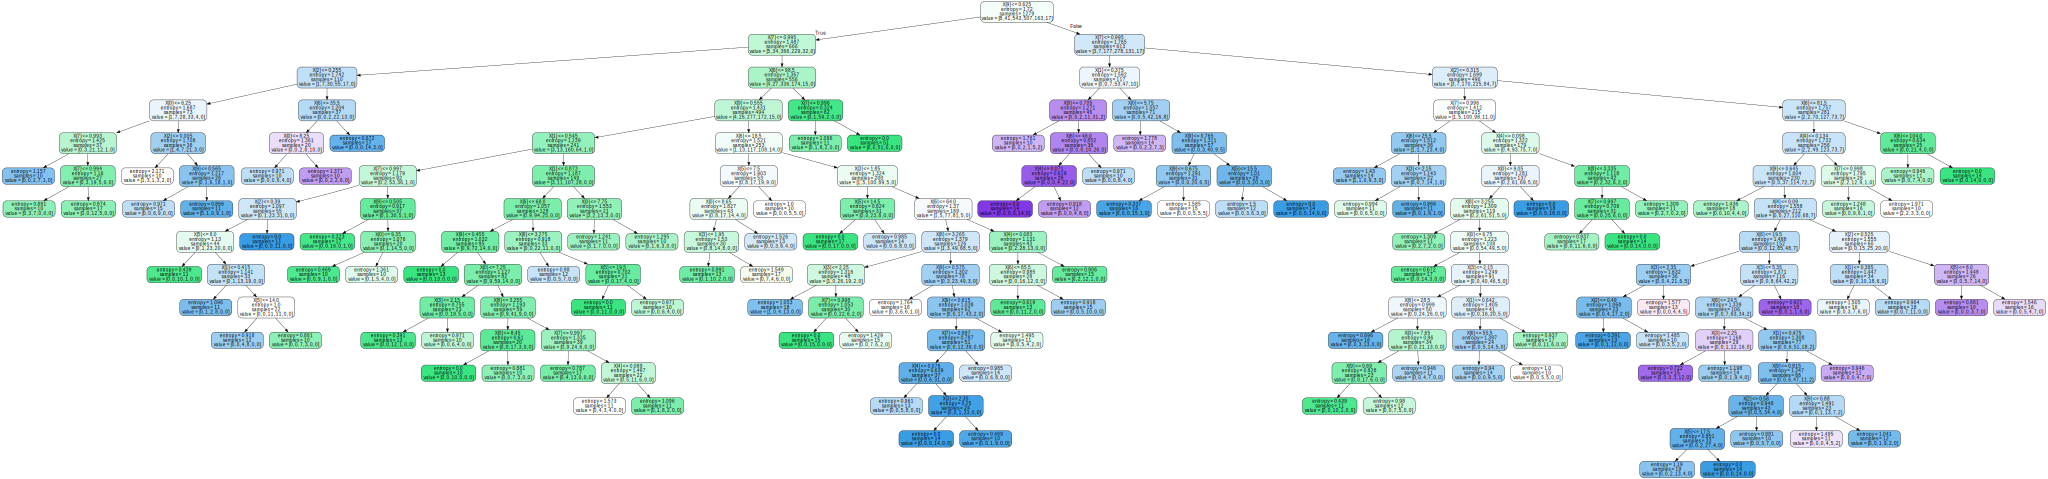

In [31]:
gdata = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(gdata)
graph

In [32]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(x_test,y_test,clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.584 

Classification report
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.12      0.17      0.14        12
          5       0.68      0.64      0.66       138
          6       0.58      0.61      0.60       131
          7       0.47      0.44      0.46        36
          8       0.00      0.00      0.00         1

avg / total       0.59      0.58      0.59       320
 

Confusion matrix
[[ 0  1  1  0  0  0]
 [ 0  2  7  3  0  0]
 [ 0  6 89 38  5  0]
 [ 0  7 30 80 13  1]
 [ 0  0  4 15 16  1]
 [ 0  0  0  1  0  0]] 



In [33]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples 
# of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Here 
# a decision tree classifier from sklearn.ensemble package was used to fit the number of decision tree classifiers 

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=50,random_state=3)
clf = clf.fit(x_train,y_train)

In [40]:
measure_performance(x_test,y_test,clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.700 

Classification report
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        12
          5       0.74      0.80      0.77       138
          6       0.67      0.73      0.70       131
          7       0.68      0.47      0.56        36
          8       0.00      0.00      0.00         1

avg / total       0.67      0.70      0.68       320
 

Confusion matrix
[[  0   0   2   0   0   0]
 [  0   0   9   3   0   0]
 [  0   0 111  27   0   0]
 [  0   0  27  96   8   0]
 [  0   0   1  17  17   1]
 [  0   0   0   1   0   0]] 



In [ ]:
# As proved here RandomForest ensemable approach gives better performance than single tree.